<!--Información del curso-->
<img align="left" style="padding-right:10px;" src="figuras/logo_ciencia_datos.png">

# Librerías

Cargando las bibliotecas que necesitamos 


In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Instrucciones

* 1. Cada inciso de los diferentes ejercicios tendrá que resolverse con los dos estilos 
* 2. Se ha colocado en cada ejercicio los datos a utilizar, si es necesario modifíquelos hasta tener un DataFrame que pueda usar para resolver cada uno de los incisos
* 3. No se aceptarán ejercicios usando funciones de graficas de pandas, por ejemplo  *df.iloc[0].plot(kind = 'bar')*  
* 4. Los datos de "Pacientes confirmados con Covid en México" se obtuvieron el día 30 de Noviembre a las 2pm
* 5. Puede agregar todas las opciones de visualización que crea convenientes, pueden ser diferentes para ambos estilos 


## Ejercicio 1:  Datos de la estación meteorologica de Progreso, Yucatán

Fuente:  https://smn.conagua.gob.mx/es/observando-el-tiempo/estaciones-meteorologicas-automaticas-ema-s

In [218]:
df= pd.read_csv("datos/Estacion_PROGRESO_90_dias_19Nov.csv")

<div class="alert alert-success">

1. Considerando todos los datos hacer una grafica de dispersión para la Temperatura de Aire (en el eje Y) y la Humadad Relativa (en el eje X) 
</ul>
</div>

In [219]:
df.head(3)

,FechaLocal,FechaUTC,TemperaturaAire(C),Precipitacion(mm),HumedadRelativa(%),PresionAtmosferica(hpa),RadiacionSolar(W/m2),DireccionViento(grados),RapidezViento(km/h),DireccionRafaga(grados),RapidezRafaga(km/h)
0,19/11/2020 15:20,19/11/2020 21:20,28,0,72,1017.0,226.0,59.0,28.0,115.0,46.0
1,19/11/2020 15:10,19/11/2020 21:10,28,0,73,1017.0,445.0,59.0,27.0,103.0,43.0
2,19/11/2020 15:00,19/11/2020 21:00,28,0,74,1017.0,475.0,60.0,28.0,97.0,53.0


In [220]:
temp = df['TemperaturaAire(C)'].values
hum = df['HumedadRelativa(%)'].values

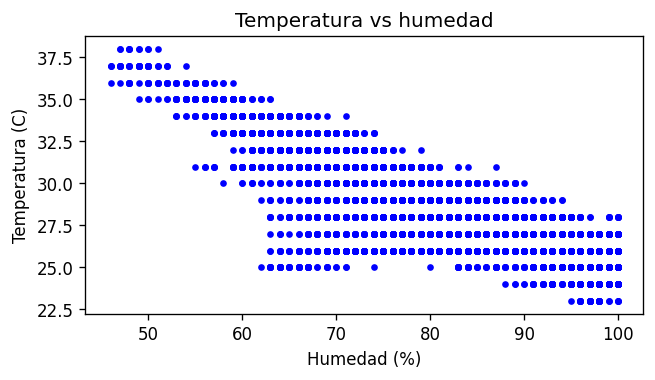

In [221]:
fig, ax = plt.subplots(figsize=(6,3), dpi=120)

ax.plot(hum, temp, 'b.')

ax.set(title='Temperatura vs humedad', xlabel='Humedad (%)', ylabel='Temperatura (C)')

plt.show()

<div class="alert alert-success">
    
2. Considerando todos los datos, hacer un histograma de los valores de la Rapidez Viento 
    
</div> 

In [222]:
viento = df['RapidezViento(km/h)'].values

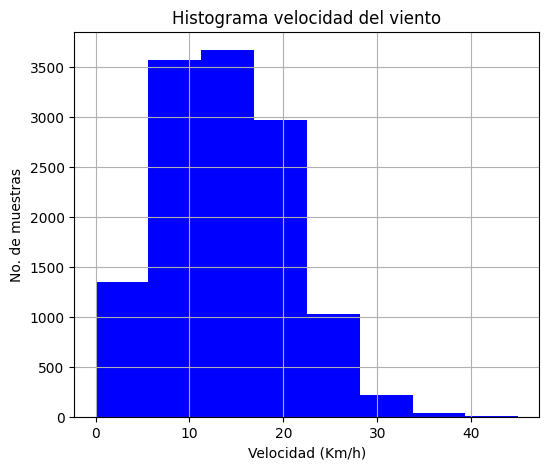

In [223]:
fig, ax = plt.subplots(figsize=(6,5), dpi=100)

# the histogram of the data
ax.hist(viento,8, density=False, facecolor='blue')

ax.set(title='Histograma velocidad del viento', xlabel= 'Velocidad (Km/h)' , 
       ylabel='No. de muestras')

ax.grid(True)

plt.show()

# Ejercicio 2: Incendios en México

In [224]:
df= pd.read_csv("datos/Serie_historica_anual_incendios_2017.csv")

<div class="alert alert-success">
    
1. Utilizar una grafica de barras para comparar el total de hectáreas afectadas para los 5 estados más afectados 
    
</div> 

In [225]:
Estados = df.groupby('Estado')['Total Hectareas'].sum().sort_values(ascending = False).head(5).index
Hectareas = df.groupby('Estado')['Total Hectareas'].sum().sort_values(ascending = False).head(5).values

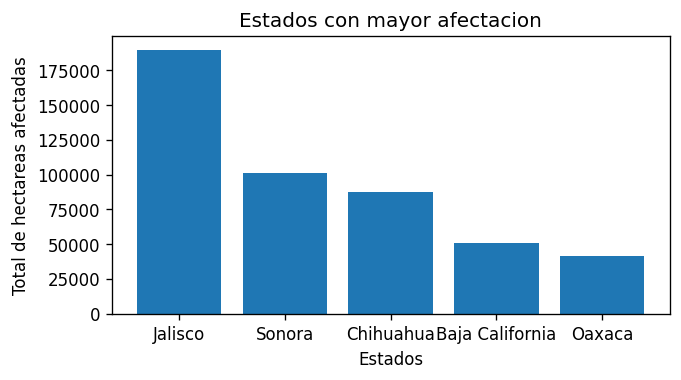

In [226]:
fig, ax = plt.subplots(figsize=(6,3), dpi=120)

ax.bar(Estados, Hectareas)          
ax.set(title='Estados con mayor afectacion', xlabel= 'Estados' , ylabel='Total de hectareas afectadas')

plt.show()

<div class="alert alert-success">
    
2. Utilizar una grafica de barras para comparar el total de hectáreas afectadas para Yucatán para los meses: abril, mayo, junio, julio y agosto 
    
</div> 

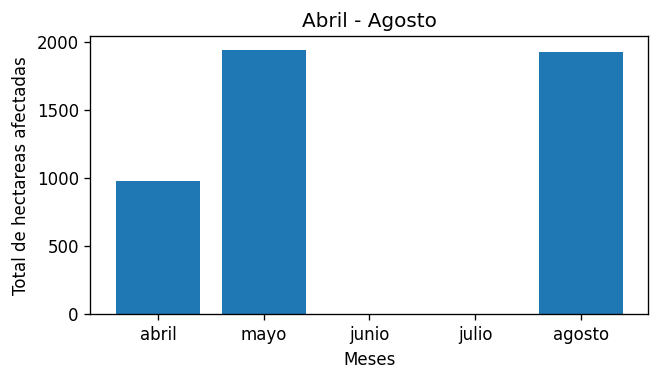

In [227]:
dfy = df[df['Estado'] == 'Yucatán']
meses = dfy.groupby('Mes Acontecimiento')['Total Hectareas'].sum()
meses['junio'] = 0
meses['julio'] = 0

months = ['abril', 'mayo', 'junio', 'julio', 'agosto']

fig, ax = plt.subplots(figsize=(6,3), dpi=120)

ax.bar(months, meses[months])          
ax.set(title='Abril - Agosto', xlabel= 'Meses' , ylabel='Total de hectareas afectadas')

plt.show()


<div class="alert alert-success">
    
3. Considerando todos los datos, hacer un histograma de la duración de los incendios 
    
</div> 

In [228]:
df['Duracion H'].values

array([ 0.  ,  0.  ,  0.  , ...,  5.33,  5.5 , 23.  ])

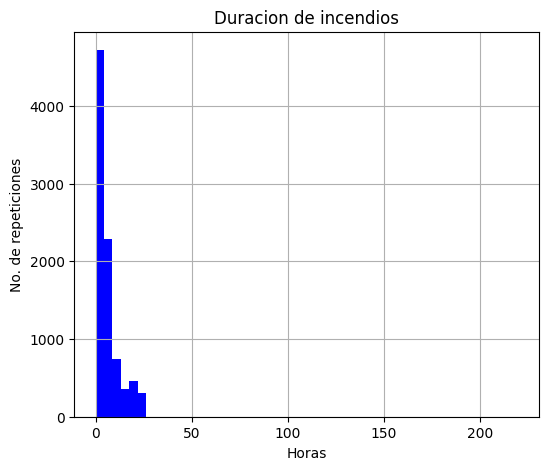

In [229]:
duracion = df['Duracion H'].values
fig, ax = plt.subplots(figsize=(6,5), dpi=100)

# the histogram of the data
ax.hist(duracion,50, density=False, facecolor='blue')

ax.set(title='Duracion de incendios', xlabel= 'Horas' , 
       ylabel='No. de repeticiones')

ax.grid(True)

plt.show()

<div class="alert alert-success">
    
4. Considerando todos los datos, hacer una grafica de dispersión entre la duración (eje X) y el total de hectáreas (eje Y)
    
</div> 

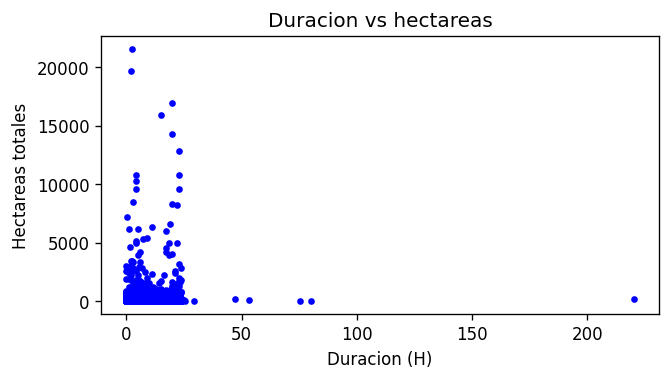

In [230]:
hs = df['Total Hectareas']


fig, ax = plt.subplots(figsize=(6,3), dpi=120)

ax.plot(duracion, hs, 'b.')

ax.set(title='Duracion vs hectareas', xlabel='Duracion (H)', ylabel='Hectareas totales')

plt.show()

# Ejercicio 3: Pacientes confirmados con Covid en México


Fuente: https://datos.covid-19.conacyt.mx/#DownZCSV

In [231]:
df= pd.read_csv("datos/Casos_Diarios_Estado_Nacional_Confirmados_20201129.csv")

In [232]:
df=df.loc[:,'nombre':]
df = df.set_index('nombre').T
df=df.reset_index()
df = df.rename(columns = {'index': 'Fecha'})
df['Fecha'] = pd.to_datetime(df['Fecha'], format= '%d-%m-%Y')
df = df.set_index('Fecha')
df.head(3)

nombre,AGUASCALIENTES,BAJA CALIFORNIA,BAJA CALIFORNIA SUR,CAMPECHE,CHIAPAS,CHIHUAHUA,DISTRITO FEDERAL,COAHUILA,COLIMA,DURANGO,...,SAN LUIS POTOSI,SINALOA,SONORA,TABASCO,TAMAULIPAS,TLAXCALA,VERACRUZ,YUCATAN,ZACATECAS,Nacional
Fecha,,,,,,,,,,,,,,,,,,,,,
2020-01-12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2020-01-14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<div class="alert alert-success">
    
1. Hacer una grafica de barras comparando todos los meses, considerando el total nacional (por mes) 
    
</div> 

In [233]:
meses = df.resample('M')['Nacional'].sum()

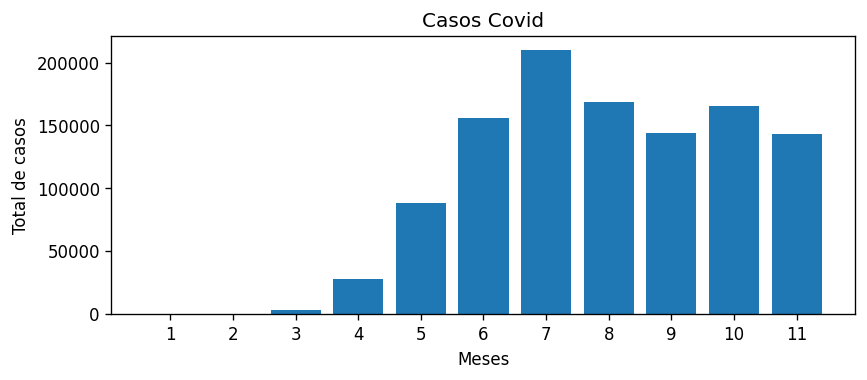

In [234]:
fig, ax = plt.subplots(figsize=(8,3), dpi=120)

ax.bar(meses.index.month, meses.values)          
ax.set(title='Casos Covid', xlabel= 'Meses' , ylabel='Total de casos', xticks = meses.index.month)

plt.show()


<div class="alert alert-success">
    
2. Hacer una grafica de barras comparando  los meses de agosto, septiembre, octubre y noviembre, considerando solo las entidades de Yucatán, Distrito Federal  y Jalisco
    
</div> 

In [235]:
df2 = df[['YUCATAN', 'DISTRITO FEDERAL', 'JALISCO']]
df2['Total'] = df2['YUCATAN'] + df2['DISTRITO FEDERAL'] + df2['JALISCO']

C:\Users\maste\AppData\Local\Temp\ipykernel_16868\1613863704.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Total'] = df2['YUCATAN'] + df2['DISTRITO FEDERAL'] + df2['JALISCO']


In [236]:
months = df2.resample('M')['Total'].sum().loc['2020-08':'2020-11']

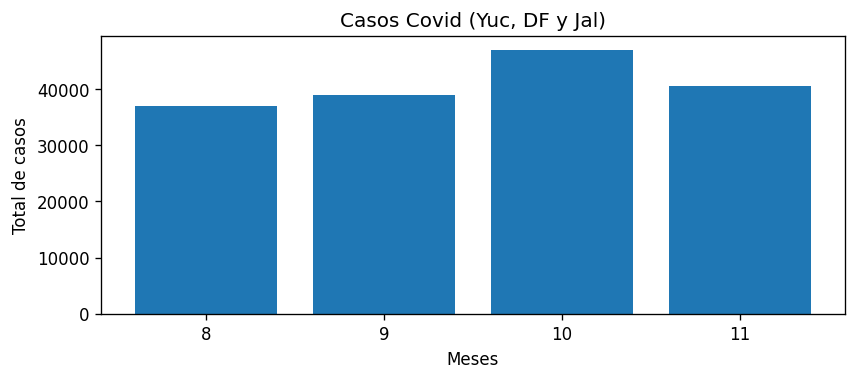

In [237]:
fig, ax = plt.subplots(figsize=(8,3), dpi=120)

ax.bar(months.index.month, months.values)          
ax.set(title='Casos Covid (Yuc, DF y Jal)', xlabel= 'Meses' , ylabel='Total de casos', xticks = months.index.month)

plt.show()
